## Acrobot

In [ ]:
# pip install "gymnasium[classic-control]"
# pip install numpy==1.24.0
# pip install gymnasium stable-baselines3

In [ ]:
from stable_baselines3.common.callbacks import BaseCallback # Define custom behavior during training

# Tracking Reward during Training
class RewardTrackerCallback(BaseCallback):
    def __init__(self, verbose = 0): # Verbose = 0: Silent Mode
        super(RewardTrackerCallback, self).__init__(verbose)
        self.rewards = [] # each episode
        self.episode_rewards = [] # each step

    def _on_step(self) -> bool:
        self.episode_rewards.append(self.locals['rewards'][0])
        if self.locals['dones'][0]:
            self.rewards.append(sum(self.episode_rewards))
            self.episode_rewards = []
        return True


### Q-Learning (DQN)

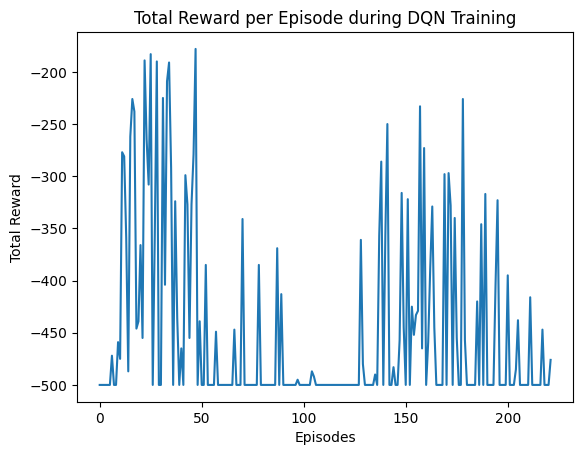

In [11]:
import gymnasium as gym # Environment
from stable_baselines3 import DQN # DQN
import matplotlib.pyplot as plt

# Initiation
## Create Environment
env = gym.make('Acrobot-v1') 
## Creat Agent
model = DQN('MlpPolicy', env, \
            learning_rate=0.001, gamma=0.999, verbose = 0, \
                policy_kwargs=dict(net_arch=[64, 64])) 
reward_tracker = RewardTrackerCallback()

# Learning
model.learn(total_timesteps = 100000, callback = reward_tracker)

# Ploting
plt.plot(reward_tracker.rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode during DQN Training')
plt.show()


### Proximal Policy Optimization

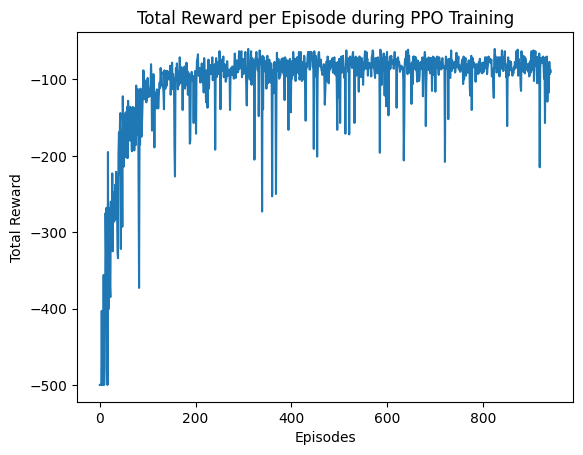

In [8]:
import gymnasium as gym
from stable_baselines3 import PPO

# Initialization
env = gym.make('Acrobot-v1')
model = PPO('MlpPolicy', env, verbose = 0)
reward_tracker = RewardTrackerCallback()

# Train
model.learn(total_timesteps = 100000, callback = reward_tracker)

# Ploting
plt.plot(reward_tracker.rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode during PPO Training')
plt.show()